---

# <center> **_Excel manipulations in Python!_**

---

Modules needed : pandas, openpyxl, xlsxwriter & xlrd <br>
you can install modules in python by running the following command: !pip install <module_name>


##### <u>*__1. Writing files to excel sheet__*</u>

In [ ]:
# we'll be using the excel sheet "Dummy.xlsx"
import pandas as pd

# The keys in our dictionary will serve as column names. Similarly, the values become the rows containing the information
sample = {'States':['California', 'Florida', 'Montana', 'Colorodo', 'Washington', 'Virginia'],
          'Capitals':['Sacramento', 'Tallahassee', 'Helena', 'Denver', 'Olympia', 'Richmond'],
          'Population':[508529, 193551, 32315, 619968, 52555, 227032]}
# populating a pandas data frame using dictionary       
data = pd.DataFrame(sample)

# the "to_excel() function writes the dataframe to excel. It's parameters are: file path "
# data.to_excel('./states.xlsx')
# better way of doing it
data.to_excel('./states.xlsx', sheet_name='States', index=False) # index=False will remove the index, experiment with it.
# similarly, in place of index we can add a specific column, like: index=<column_name>


In [ ]:
import os
# path = D:\Docs\Python Codes\Excel Sheet Manipulation\states.xlsx"
os.system("start EXCEL.EXE states.xlsx")

# # alternate way to open a file:
# import subprocess
# subprocess.check_call(['open', '-a', 'Microsoft Excel'])

In [ ]:

# Note:
# path = '/home/mike/Documents/income2.xlsx'

# with pd.ExcelWriter(path, engine='xlsxwriter') as w:

# for sheet, df in income_sheets.items():
# df.to_excel(w, sheet_name=sheet, index=False)
#modules to have installed: 
# xlsxwriter
# xlrd
# xlwt

---

##### <u>*__2. Reading excel (i.e. .xlsx) files__*</u>

In [1]:
import pandas as pd
states = pd.read_excel('./states.xlsx')
#states.head(n=), prints the first n lines, dfault value is 5
states

,States,Capitals,Population
0,California,Sacramento,508529
1,Florida,Tallahassee,193551
2,Montana,Helena,32315
3,Colorodo,Denver,619968
4,Washington,Olympia,52555
5,Virginia,Richmond,227032


In [ ]:
# reading particular columns
columns = [0, 2]
states = pd.read_excel('./states.xlsx', usecols=columns)
states

In [ ]:
x = dict(states.head())
print(x.keys())
print(x.values())

In [ ]:
# <data_frame.to_dict(orient) is used to convert a data frame to given orientation
d = states.to_dict('list')
print(d)

In [ ]:
# to get the total # of columns in a excel sheet we do:
d = states.to_dict('list')
print(len(d))

---

### <u>**Note:**</u>
pandas.DataFrame.to_dict() method is used to convert DataFrame to Dictionary (dict) object. Use this method to convert DataFrame to python dictionary (dict) object by converting column names as keys and the data for each row as values. <br>

This method takes param orient which is used the specify the output format. It takes values <b>'dict', 'list', 'series', 'split', 'records', </b> & <b>'index'.

---

---


### Note -
We have a excel sheet & we wanna copy the data from one excel sheet & paste it in another. <br>
The Copying & pasting can be done in 2 ways - 
```
a. Copy - from particular cells in the excel sheet.
b. Paste - to particular cells in the excel sheet.


In [ ]:
from rich import print as print_
import pandas as pd
import openpyxl
import time
import os



read_excel_sheet_path = "D:\\Docs\\04_Python Codes\\Excel Sheet Manipulation\\Guniea_pig_READ_test_excel.xlsx"
write_excel_sheet_path = "D:\\Docs\\04_Python Codes\\Excel Sheet Manipulation\\Guniea_pig_WRITE_test_excel.xlsx"

# ---------------------------------------------------------------------------------------------------------------------------------------
def read_excel(path : str, sheet_name : str = None): 
    """
    This function reads a excel sheet from the given path & returns the data in dictionary form
    """
    try:
        df = pd.read_excel(path, sheet_name=sheet_name)
        # converting the whole excel sheet into a dictionary.
        df_dict = df.to_dict('list') 
        return df, df_dict
    
    except FileNotFoundError:
        print(f"Error: The file '{path}' was not found.")
    except ValueError as ve:
        print(f"Error: {ve}")
    except PermissionError as pe:
        print(pe)
    except Exception as e:
        print(f"Following error occured ---> {e}")

# ---------------------------------------------------------------------------------------------------------------------------------------

def smart_update_excel_columns(
    read_file_path: str,
    read_sheet_name: str,
    write_file_path: str,
    write_sheet_name: str,
    in_place: bool,
    read_column_list: list,
    write_column_list: list,
    updated_data_dict: dict,
    preserve_formatting: bool
):
    """
    Updates specified columns in Excel. Allows preserving formatting if needed.

    Parameters:
    - read_file_path: Excel file to read from
    - read_sheet_name: Sheet name to read
    - write_file_path: Path to write updated Excel
    - write_sheet_name: Sheet name to write
    - in_place: If True, overwrite; else write to a new file
    - read_column_list: List of key columns to match
    - write_column_list: List of columns to update
    - updated_data_dict: {key_value: [val1, val2, ...]} for updating
    - preserve_formatting: If True, use openpyxl to preserve formatting
    """
    try:
        # ==================
        # FAST MODE (pandas)
        # ==================
        if not preserve_formatting:
            df = pd.read_excel(read_file_path, sheet_name=read_sheet_name, dtype=str)

            missing_cols = [col for col in read_column_list + write_column_list if col not in df.columns]
            if missing_cols:
                raise ValueError(f"Missing columns in Excel: {missing_cols}")

            key_column = read_column_list[0]

            def apply_updates(row):
                key = str(row[key_column])
                if key in updated_data_dict:
                    for col, val in zip(write_column_list, updated_data_dict[key]):
                        row[col] = val
                return row

            df = df.apply(apply_updates, axis=1)

            save_path = write_file_path if in_place else write_file_path.replace(".xlsx", "_updated.xlsx")
            df.to_excel(save_path, sheet_name=write_sheet_name, index=False)
            print(f"✅ File saved (no formatting): {save_path}")

        # ======================
        # FORMATTED MODE (slow)
        # ======================
        else:
            wb = openpyxl.load_workbook(read_file_path)
            if read_sheet_name not in wb.sheetnames:
                raise ValueError(f"Sheet '{read_sheet_name}' not found.")

            ws = wb[read_sheet_name]

            # Get headers row
            headers = {cell.value: idx + 1 for idx, cell in enumerate(ws[1]) if cell.value}

            # Check if columns exist
            missing_cols = [col for col in read_column_list + write_column_list if col not in headers]
            if missing_cols:
                raise ValueError(f"Missing columns in Excel: {missing_cols}")

            key_col = headers[read_column_list[0]]
            write_cols = [headers[col] for col in write_column_list]

            for row in ws.iter_rows(min_row=2, max_row=ws.max_row):
                key_val = str(row[key_col - 1].value).strip()
                if key_val in updated_data_dict:
                    for i, col in enumerate(write_cols):
                        ws.cell(row=row[0].row, column=col, value=updated_data_dict[key_val][i])

            save_path = write_file_path if in_place else write_file_path.replace(".xlsx", "_formatted_updated.xlsx")
            wb.save(save_path)
            wb.close()
            print(f"✅ File saved (formatting preserved): {save_path}")

    except FileNotFoundError:
        print(f"❌ File not found: '{read_file_path}'")
    except ValueError as ve:
        print(f"❌ ValueError: {ve}")
    except PermissionError:
        print("❌ Permission error: Is the file open?")
    except Exception as e:
        print(f"❌ Unexpected error: {e}")




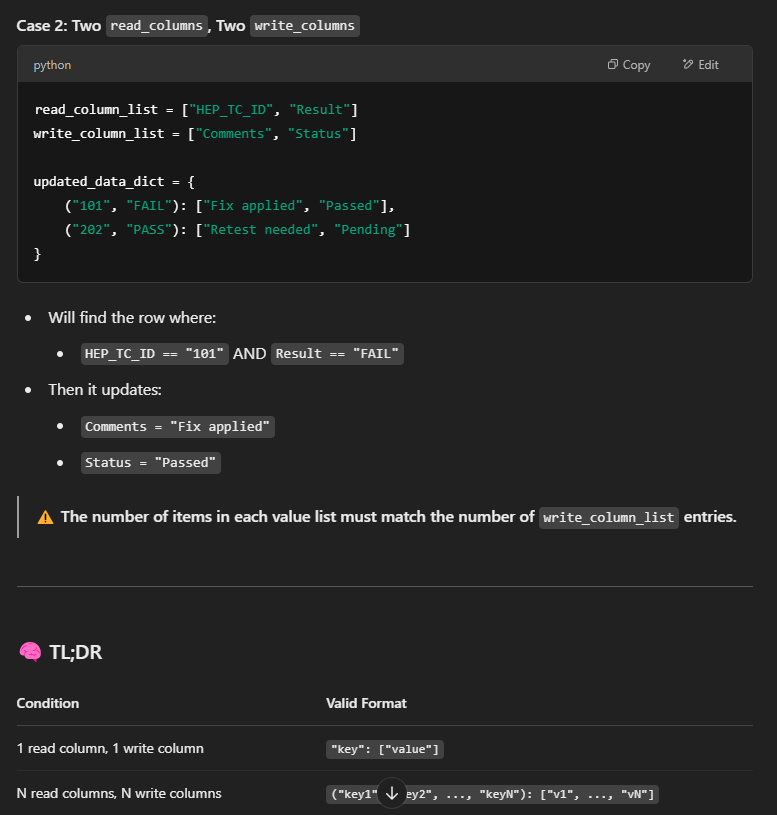

In [8]:
import pandas as pd

def read_excel_columns_to_dict(
    file_path: str,
    sheet_name: str,
    key_columns: list
) -> dict:
    """
    Reads specific columns from an Excel sheet and returns data as a dictionary 
    where keys are values from the given key columns.

    Parameters:
    ----------
    file_path : str
        Path to the Excel file to read.
    sheet_name : str
        Name of the sheet from which to read data.
    key_columns : list
        List of column names to be used as dictionary keys.

    Returns:
    -------
    dict
        Dictionary where each key is a value (or tuple of values) from the key columns,
        and value is the full row as a dictionary.

    Raises:
    ------
    FileNotFoundError: If the Excel file doesn't exist.
    ValueError: If any of the specified key columns are missing.
    PermissionError: If the file is open or inaccessible.
    Exception: For all other unforeseen errors.
    """
    try:
        df = pd.read_excel(file_path, sheet_name=sheet_name, dtype=str)

        missing_cols = [col for col in key_columns if col not in df.columns]
        if missing_cols:
            raise ValueError(f"Missing columns in Excel file: {missing_cols}")

        result = {}
        for _, row in df.iterrows():
            key = tuple(row[col] for col in key_columns)
            if len(key) == 1:
                key = key[0]
            result[key] = row.to_dict()

        return result

    except FileNotFoundError:
        print(f"❌ File not found: '{file_path}'")
    except ValueError as ve:
        print(f"❌ ValueError: {ve}")
    except PermissionError:
        print("❌ Permission error: Is the file open?")
    except Exception as e:
        print(f"❌ Unexpected error: {e}")

# ---------------------------------------------------------------------------------------------------------------------------------------

import pandas as pd
import openpyxl

def update_excel_from_dict(
    file_path: str,
    sheet_name: str,
    update_dict: dict,
    key_columns: list,
    target_columns: list,
    write_mode: str = "new",  # Options: "in_place" or "new"
    preserve_formatting: bool = False
):
    """
    Updates specific columns in an Excel sheet using a dictionary of values.

    Parameters:
    ----------
    file_path : str
        Path to the Excel file to update.
    sheet_name : str
        Sheet name where updates are to be made.
    update_dict : dict
        Dictionary of updates. Keys should match key_columns, and values are row-wise dicts.
    key_columns : list
        List of column names to match for identifying rows to update.
    target_columns : list
        List of column names to update with values from the dictionary.
    write_mode : str
        "in_place" to overwrite the original file, "new" to save to a new file.
    preserve_formatting : bool
        True to use `openpyxl` for preserving formatting, False to use `pandas`.

    Raises:
    ------
    FileNotFoundError: If the Excel file doesn't exist.
    ValueError: If key or target columns are missing in the file.
    PermissionError: If the file is open or locked.
    Exception: For all other unforeseen errors.
    """
    try:
        save_path = file_path if write_mode == "in_place" else file_path.replace(".xlsx", "_updated.xlsx")

        if preserve_formatting:
            wb = openpyxl.load_workbook(file_path)
            if sheet_name not in wb.sheetnames:
                raise ValueError(f"Sheet '{sheet_name}' not found.")
            ws = wb[sheet_name]

            headers = {cell.value: idx + 1 for idx, cell in enumerate(ws[1])}
            for col in key_columns + target_columns:
                if col not in headers:
                    raise ValueError(f"Column '{col}' missing in sheet.")

            for row in ws.iter_rows(min_row=2, max_row=ws.max_row):
                key = tuple(str(row[headers[col] - 1].value) for col in key_columns)
                if len(key) == 1:
                    key = key[0]
                if key in update_dict:
                    for col in target_columns:
                        value = update_dict[key].get(col, None)
                        ws.cell(row=row[0].row, column=headers[col]).value = value

            wb.save(save_path)
            wb.close()
            print(f"✅ File saved (formatting preserved): {save_path}")

        else:
            df = pd.read_excel(file_path, sheet_name=sheet_name, dtype=str)

            for col in key_columns + target_columns:
                if col not in df.columns:
                    raise ValueError(f"Missing column '{col}' in Excel file.")

            for i, row in df.iterrows():
                key = tuple(row[col] for col in key_columns)
                if len(key) == 1:
                    key = key[0]
                if key in update_dict:
                    for col in target_columns:
                        df.at[i, col] = update_dict[key].get(col, None)

            df.to_excel(save_path, sheet_name=sheet_name, index=False)
            print(f"✅ File saved (no formatting): {save_path}")

    except FileNotFoundError:
        print(f"❌ File not found: '{file_path}'")
    except ValueError as ve:
        print(f"❌ ValueError: {ve}")
    except PermissionError:
        print("❌ Permission error: Is the file open?")
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
# ---------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
read_excel_sheet_path = "D:\\Docs\\04_Python Codes\\Excel Sheet Manipulation\\Guniea_pig_READ_test_excel.xlsx"
write_excel_sheet_path = "D:\\Docs\\04_Python Codes\\Excel Sheet Manipulation\\Guniea_pig_WRITE_test_excel.xlsx"

d = read_excel_columns_to_dict(read_excel_sheet_path, "9_IPB", ["SW Version", "Test Evaluation Comment"])
#print_(d)
c = read_excel(read_excel_sheet_path, sheet_name="9_IPB")[1]
# for k, v in c.items():
#     print_(k, v)
#     print_("---"*18)
print_(c)



{
    'Measurements / Time\n(Filename, picture)': [
        "['575_sil_ipb_dar_pitching_state_ngear.mf4z']",
        "['576_sil_ipb_dar_pitching_state_pgear.mf4z']",
        "['577_sil_ipb_dar_pitching_state_rgear.mf4z']",
        "['578_sil_ipb_dar_pitching_gearnoposition.mf4z']",
        "['579_sil_ipb_dar_pitching_unknowactuatorstate.mf4z']",
        "['580_sil_ipb_dar_pitching_applyingstate.mf4z']"
    ],
    'SW Version': [
        'MOD: EL1CG000317, ACT: EL2CG000422',
        'MOD: EL1CG000317, ACT: EL2CG000422',
        'MOD: EL1CG000317, ACT: EL2CG000422',
        'MOD: EL1CG000317, ACT: EL2CG000422',
        nan,
        'MOD: EL1CG000317, ACT: EL2CG000422'
    ],
    'Test Evaluation': ['PASSED', 'PASSED', 'FAILED', 'UNKNOWN', 'UNKNOWN', 'FAILED'],
    'Test Evaluation Comment': [
        '"Precondition: Vehicle state is static\n\t: Fulfilled (49.006<->53.191)\nPrecondition: Driver is 
present\n\t: Fulfilled (52.066<->58.001)\nPrecondition: Driver seat belt is buckled\n\t: Fulfilled 
(49.006<->58.001)\nPrecondition: Actuators are in \'Applied\' state\n\t: Fulfilled (49.906<->52.311)\n',
        '"Precondition: Vehicle state is static\n\t: Fulfilled (23.036<->34.751)\nPrecondition: Driver is 
present\n\t: Fulfilled (19.766<->34.751)\nPrecondition: Driver seat belt is buckled\n\t: Fulfilled 
(17.756<->34.751)\nPrecondition: Actuators are in \'Applied\' state\n\t: Not Fulfilled\nPrecondition: Engine State 
is IDLE\n\t: Fulfilled ',
        '"Precondition: Vehicle state is static\n\t: Fulfilled (32.696<->42.691)\nPrecondition: Driver is 
present\n\t: Fulfilled (35.236<->42.691)\nPrecondition: Driver seat belt is buckled\n\t: Fulfilled 
(32.696<->42.691)\nPrecondition: Actuators are in \'Applied\' state\n\t: Fulfilled (32.696<->42.691)\nPrecondition:
Engine State is IDLE\n\t: Fulfilled ',
        '"Precondition: Vehicle state is static\n\t: Not Fulfilled\nPrecondition: Driver is present\n\t: Fulfilled 
(17.546<->18.021,19.556<->34.541)\nPrecondition: Driver seat belt is buckled\n\t: Fulfilled 
(17.546<->34.541)\nPrecondition: Actuators are in \'Applied\' state\n\t: Not Fulfilled\nPrecondition: Engine State 
is IDLE\n\t: Fulfilled ',
        '"[Errno 2] No such file or directory: \'D:/ci_ws/CV/afb63116c6_SILDEV\\\\SYS_IPB_TestCase_0844-v01.py\'"',
        '"Precondition: Driver is present\n\t: Fulfilled (3.006<->9.201,9.726<->29.701)\nPrecondition: Driver seat 
belt is buckled\n\t: Fulfilled (3.006<->29.701)\nPrecondition: Actuators are in \'Applying\' state\n\t: Fulfilled 
(9.876<->11.311)\nPrecondition: Engine State is IDLE\n\t: Fulfilled '
    ]
}

---

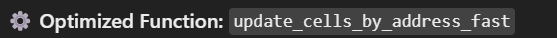

In [ ]:
from openpyxl import load_workbook
import time

def update_cells_by_address_fast(
    file_path: str,
    sheet_name: str,
    updates: dict,
    in_place: bool = True
):
    """
    Efficiently updates specific cells in an Excel file using openpyxl.

    Parameters:
    - file_path (str): Path to the Excel file.
    - sheet_name (str): Name of the sheet to update.
    - updates (dict): Dictionary where keys are cell addresses (e.g., 'B2') and values are the new data.
    - in_place (bool): If True, edits the file directly. If False, creates a new file with '_updated' suffix.

    Example:
    updates = {
        'A2': 'PASS',
        'C4': 42,
        'D10': 'Updated'
    }
    """

    try:
        # Try loading the workbook (no data_only or read_only to allow editing)
        max_attempts = 5
        for attempt in range(max_attempts):
            try:
                wb = load_workbook(file_path)
                break
            except PermissionError:
                if attempt < max_attempts - 1:
                    print(f"🔄 File in use. Retrying... ({attempt + 1}/{max_attempts})")
                    time.sleep(2)
                else:
                    raise PermissionError(f"❌ File is open: '{file_path}'")

        if sheet_name not in wb.sheetnames:
            raise ValueError(f"❌ Sheet '{sheet_name}' not found.")

        ws = wb[sheet_name]

        # Update cells (FAST, no extra logic)
        for cell_address, value in updates.items():
            ws[cell_address] = value

        # Save the file
        if in_place:
            wb.save(file_path)
            print(f"✅ File updated in place: {file_path}")
        else:
            new_file = file_path.replace(".xlsx", "_updated.xlsx")
            wb.save(new_file)
            print(f"✅ File saved as: {new_file}")

        wb.close()

    except FileNotFoundError:
        print(f"❌ File not found: '{file_path}'")
    except ValueError as ve:
        print(f"❌ ValueError: {ve}")
    except PermissionError as pe:
        print(f"❌ {pe}")
    except Exception as e:
        print(f"❌ Unexpected error: {e}")